# Assignment 2:
    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a significant threshold for the whole eercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [549]:
from __future__ import division, print_function
__author__ = 'LE XU, lx565 CUSP 2016'
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pylab as pl
from pandas import Series, DataFrame
from getCitiBikeCSV import getCitiBikeCSV

import pandas
%matplotlib inline
%pylab inline


dfdata = (os.environ.get('DFDATA'))
print (dfdata)

Populating the interactive namespace from numpy and matplotlib
/gws/open/NYCOpenData/nycopendata/data


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. You should use data from multiple months, joining multiple datasets, thus addressing systematic errors as well

In [550]:
datestring = '201501'

In [551]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [552]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [553]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [554]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [555]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [556]:
#dropping some data I no longer need
#... your code here...
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,NaN,55.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,52.0,NaN
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,41.0,NaN
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,46.0,NaN
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,38.0,NaN


In [557]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,279924.000000,285552.000000,227764.000000,52093.000000
mean,654.325583,443.535006,40.735804,-73.990177,440.337557,40.735607,-73.990398,18147.291481,1974.951419,1.162485,40.305272,38.951145
std,900.775928,332.580265,0.018773,0.011681,326.010259,0.018718,0.011742,2065.313794,11.574637,0.419490,11.595240,11.405112
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,16.000000,17.000000
25%,334.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16355.000000,NaN,1.000000,NaN,NaN
50%,504.000000,417.000000,40.738274,-73.990093,417.000000,40.737815,-73.990617,18148.000000,NaN,1.000000,NaN,NaN
75%,772.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981854,19903.000000,NaN,1.000000,NaN,NaN
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,116.000000,89.000000


In [558]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)



lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

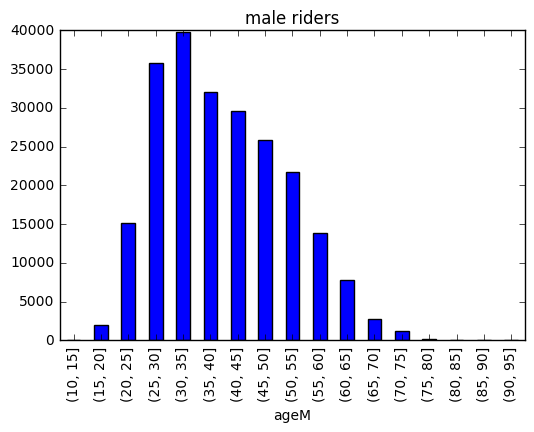

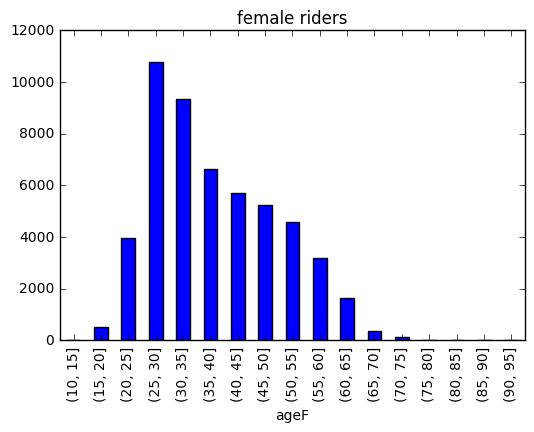

In [559]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")


# Figure 1: histogrammed distribution of riders' ages by gender

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]       0.000075
(90, 95]       0.000000


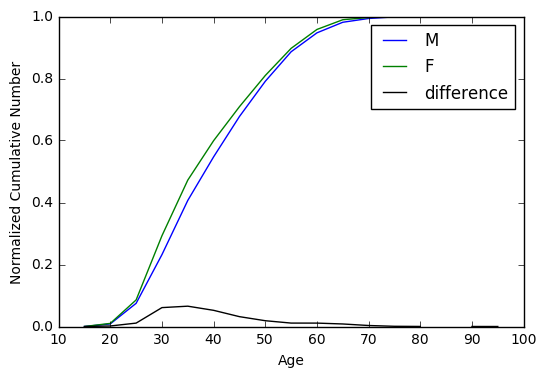

In [560]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

# Figure 2: the cumulative distribution of CitiBike riders' ages by gender

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [561]:
import scipy.stats

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [562]:
ks = scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)], df.ageF[~np.isnan(df.ageF)])
print (ks)

Ks_2sampResult(statistic=0.067442557802207204, pvalue=4.0408611999082294e-168)


# FILL IN THE CELL BELOW!

In [563]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function


The scipy KS test is to test whether 2 samples are drawn from the same distribution. 
as : 
### H0:  the two samples we are testing come from the same distribution;
### HA:  the two samples we are testing do not come from the same distribution

The scipy KS test returns two values:
D-KS statistic
P-value

if we set the alpha = 0.05

We will reject the null hypothesis when the p-value is smaller than alpha. 

=============================


The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [564]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
a = 0.05
from IPython.display import Image
#Image(filename="../plotsforclasses/ks2sample_table.png")

# Now redo the test with a subsample of the data: take only 1 ride every of 200 

In [565]:
sub_df = df.sample(frac = 1/200)
sub_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
172814,434,1/19/2015 19:13,1/19/2015 19:20,435,W 21 St & 6 Ave,40.741740,-73.994156,537,Lexington Ave & E 24 St,40.740259,-73.984092,18200,Subscriber,1981.0,1,2015-01-19 19:13:00,34.0,NaN
128282,199,1/15/2015 7:53,1/15/2015 7:57,513,W 56 St & 10 Ave,40.768254,-73.988639,468,Broadway & W 55 St,40.765265,-73.981923,17950,Subscriber,1988.0,1,2015-01-15 07:53:00,27.0,NaN
244332,822,1/25/2015 11:30,1/25/2015 11:43,348,W Broadway & Spring St,40.724910,-74.001547,430,York St & Jay St,40.701485,-73.986569,20342,Subscriber,1953.0,1,2015-01-25 11:30:00,62.0,NaN
250904,492,1/25/2015 20:08,1/25/2015 20:17,508,W 46 St & 11 Ave,40.763414,-73.996674,508,W 46 St & 11 Ave,40.763414,-73.996674,14719,Customer,NaN,0,2015-01-25 20:08:00,NaN,NaN
74430,598,1/9/2015 16:04,1/9/2015 16:14,536,1 Ave & E 30 St,40.741444,-73.975361,379,W 31 St & 7 Ave,40.749156,-73.991600,18762,Subscriber,1962.0,1,2015-01-09 16:04:00,53.0,NaN


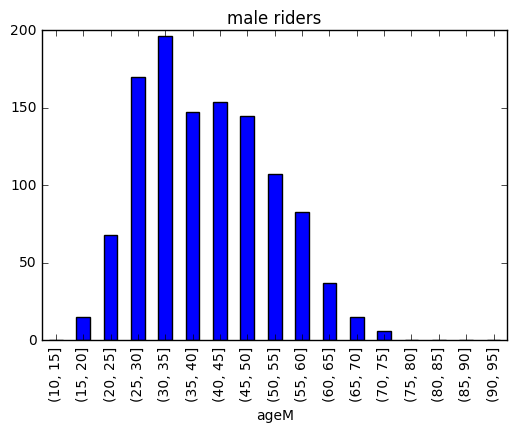

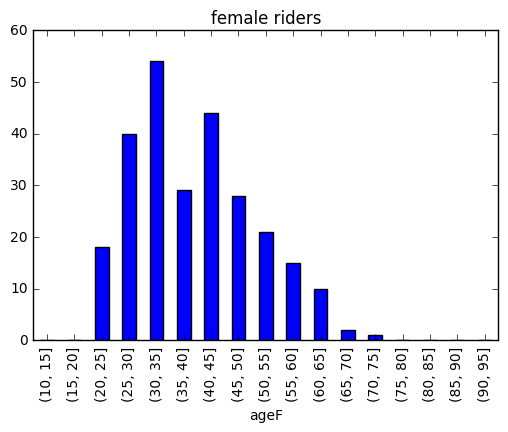

In [566]:
bins = np.arange(10, 99, 5)
axM = sub_df.ageM.groupby(pd.cut(sub_df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = sub_df.ageF.groupby(pd.cut(sub_df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.013123
(20, 25]       0.003914
(25, 30]       0.000027
(30, 35]       0.034655
(35, 40]       0.016733
(40, 45]       0.049939
(45, 50]       0.029950
(50, 55]       0.016489
(55, 60]       0.001125
(60, 65]       0.006922
(65, 70]       0.001433
(70, 75]       0.000000
(75, 80]       0.000000
(80, 85]       0.000000
(85, 90]       0.000000
(90, 95]       0.000000


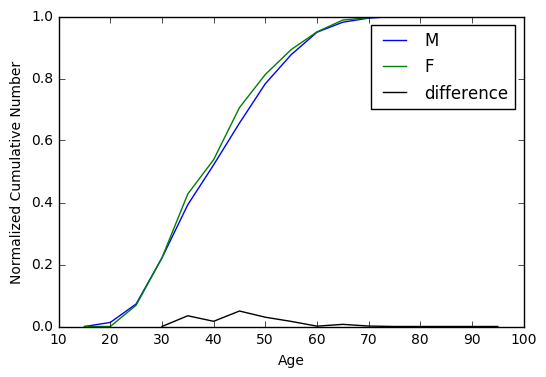

In [567]:
#print df.ageS, df.ageS.cumsum()

csM_sub=sub_df.ageM.groupby(pd.cut(sub_df.ageM, bins)).agg([count_nonzero]).cumsum()

csF_sub=sub_df.ageF.groupby(pd.cut(sub_df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM_sub / csM_sub.max()-csF_sub / csF_sub.max()))

pl.plot(bins[:-1] + 5, csM_sub / csM_sub.max(), label = "M")
pl.plot(bins[:-1] + 5, csF_sub / csF_sub.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF_sub / csF_sub.max() - csM_sub / csM_sub.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [568]:
sub_ks = scipy.stats.ks_2samp(sub_df.ageM, sub_df.ageF)
print (sub_ks)

Ks_2sampResult(statistic=0.61764705882352944, pvalue=3.233989907370344e-239)


### for P-value smaller than a = 0.05, so we reject the H0, which is H0: the 2 samples follow the specified/same distribution.  So the two subsamples follow different distribution. 


# Pearson's  test for correlation

## notice that the Pearson's is a pairwise test: the samples need to be 
## a. sorted and 
## b. the same size!

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



### As pearson test is to calculates a Pearson correlation coefficient and the p-value for testing non-correlation. 

### H0 : the 2 samples do not have correlation.
### HA: the 2 samples have correlation


In [569]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

#amount of female rider is smaller than male rider
s_dfM = df.ageM.sort(inplace = False)
s_dfF = df.ageF.sort(inplace = False)



/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [570]:
pson = scipy.stats.pearsonr(s_dfM.sample(len(s_dfF)), 
                            s_dfF)
pson[0]
print ("Pearson’s correlation coefficient is %f, and its p value is %f" %(pson[0],pson[1]))

Pearson’s correlation coefficient is 0.000160, and its p value is 0.970942


### The correlation coeff is relatively small, so the correlation is rather weak. Since the p-value roughly indicates the probability of an uncorrelated system of two datasets. Since the p value is larger than a, so H0 is not rejected.  So the datasets might not correlated. 



# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [571]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()
csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

norm_M = csM/csM.sum()
norm_F = csF/csF.sum()

In [572]:
spr = scipy.stats.spearmanr(norm_M, norm_F)
spr


SpearmanrResult(correlation=0.998159509202454, pvalue=1.119684990414529e-19)

In [573]:
## please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??


### H0 : the 2 samples do not have correlation.
### HA: the 2 samples do have correlation

#### Correlation coefficient of Spearman test is returned first. The second returned value is the two-sided p-value for a hypothesis test whose null hypothesis is that two sets of data are uncorrelated.
#### The result: since p value is larger than a so can not reject H0, 2 samples are not correlated.

## EXTRA CREDIT:  CHOOSE ONE OF THE TESTS, AND TEST THE CORRELATION OF AGES  OF RIDERS DURING THE DAY VS DURING THE NIGHT!



### H0 : the ages of riders during the day do not have correlation with the ages of riders during the night.
### HA: the ages of riders during the day have correlation with the ages of riders during the night.

In [580]:
df.head()
df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [581]:
day = df[(df['date'].dt.hour >=6) & (df['date'].dt.hour < 18) ] # 6 am to 6 pm
nit = df[(df['date'].dt.hour >=18) | (df['date'].dt.hour < 6) ] # 6 pm - 12pm and 12 am to 6

In [582]:
day.age.head()

563     NaN
564    32.0
565    46.0
566    44.0
567    28.0
Name: age, dtype: float64

In [583]:
nit.age.head()

0    55.0
1    52.0
2    41.0
3    46.0
4    38.0
Name: age, dtype: float64

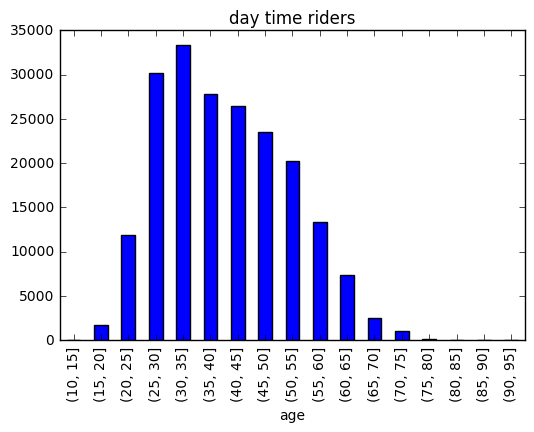

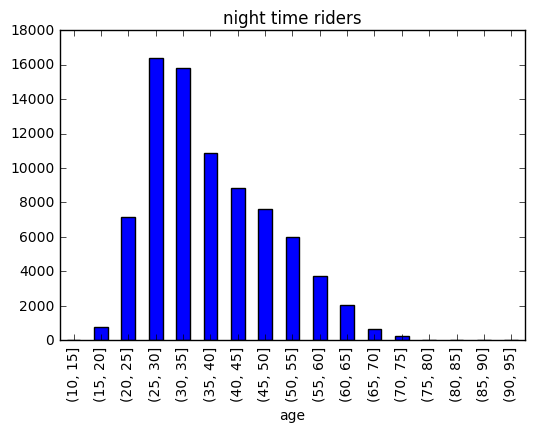

In [578]:
bins = np.arange(10, 99, 5)

axF = day.age.groupby(pd.cut(day.age, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("day time riders")

axM = nit.age.groupby(pd.cut(nit.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("night time riders")

In [584]:
spr = scipy.stats.spearmanr(day[~np.isnan(df.ageM)].age[:len(nit[~np.isnan(df.ageM)].age)], nit[~np.isnan(df.ageM)].age)
spr

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


SpearmanrResult(correlation=-0.0040135995101636688, pvalue=0.29940968334206031)

### the correlation is not strong and p value is big. So cant reject H0. So there is no correlation.
